<a href="https://colab.research.google.com/github/su-sumico/seminar/blob/main/Static_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://automating-gis-processes.github.io/CSC/lessons/L6/static-maps.html

shp: シェープファイルの可視化

You should have following Shapefiles in the dataE5 folder:

addresses.shp

metro.shp

roads.shp

some.geojson

TravelTimes_to_5975375_RailwayStation.shp

Vaestotietoruudukko_2015.shp

In [7]:
!pip install mapclassify

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filepaths
grid_fp = r"/content/drive/MyDrive/Remote sensing/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"/content/drive/MyDrive/Remote sensing/dataE5/roads.shp"
metro_fp = r"/content/drive/MyDrive/Remote sensing/dataE5/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [10]:
# Get the CRS of the grid
gridCRS = grid.crs

# Reproject geometries using the crs of travel time grid
roads['geometry'] = roads['geometry'].to_crs(crs=gridCRS)
metro['geometry'] = metro['geometry'].to_crs(crs=gridCRS)

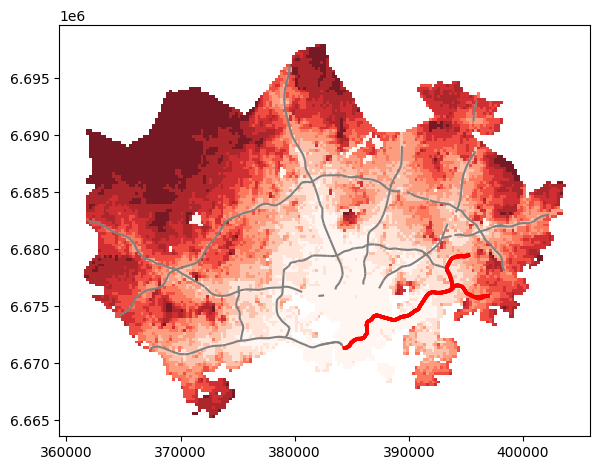

In [11]:
# Visualize the travel times into 9 classes using "Quantiles" classification scheme
# Add also a little bit of transparency with `alpha` parameter
# (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
my_map = grid.plot(column="car_r_t", linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=my_map, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=my_map, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = r"/content/drive/MyDrive/Remote sensing/dataE5/static_map.png"
plt.savefig(outfp, dpi=300)